**Microsoft Malware Prediction**


- Business loss wrt software security.
- Why this challanger is important to get into big companies software security team.
- Popultion of software machines.

**Business understanding** : The malware industry continues to be a well-organized, well-funded market dedicated to evading traditional security measures. Once a computer is infected by malware, criminals can hurt consumers and enterprises in many ways.

**Problem Statement** : Can you help protect more than one billion machines from damage BEFORE it happens?

For more details visit the following link

https://www.kaggle.com/c/microsoft-malware-prediction

# Loading Data

In [2]:
import pandas as pd

In [5]:
# Reading data
#df=pd.read_csv('train.csv')

Importing required Libraries.

In [ ]:
import pandas as pd 
import dask.dataframe as dd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
# Display all columns and rows. Displays Unubridged output.

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
%time train_df = pd.read_csv('train.csv')

CPU times: user 1min 16s, sys: 19.2 s, total: 1min 35s
Wall time: 1min 44s


In [ ]:
train_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
MachineIdentifier                                    object
ProductName                                          object
EngineVersion                                        object
AppVersion                                           object
AvSigVersion                                         object
IsBeta                                               int64
RtpStateBitfield                                     float64
IsSxsPassiveMode                                     int64
DefaultBrowsersIdentifier                            float64
AVProductStatesIdentifier                            float64
AVProductsInstalled                                  float64
AVProductsEnabled                                    float64
HasTpm                                               int64
CountryIdentifier                                    int64
CityIdentifier                                

memory_usage() shows memory usage of each feature in bytes.
To make this easier to read, we convert all values to megabytes.

In [ ]:
train_df.memory_usage(deep=True) * 1e-6

Index                                                  0.000128
MachineIdentifier                                    794.011987
ProductName                                          614.728292
EngineVersion                                        606.660834
AppVersion                                           638.382917
AvSigVersion                                         610.148193
IsBeta                                                71.371864
RtpStateBitfield                                      71.371864
IsSxsPassiveMode                                      71.371864
DefaultBrowsersIdentifier                             71.371864
AVProductStatesIdentifier                             71.371864
AVProductsInstalled                                   71.371864
AVProductsEnabled                                     71.371864
HasTpm                                                71.371864
CountryIdentifier                                     71.371864
CityIdentifier                          

In [ ]:
# .sum() gives the total memory of dataframe in megabytes
train_df.memory_usage(deep=True).sum() * 1e-6

20945.097245999998

Changing data types for efficient memory management

In [ ]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [ ]:
%time train_df = pd.read_csv('train.csv',dtype=dtypes)

CPU times: user 2min 14s, sys: 6.93 s, total: 2min 21s
Wall time: 2min 21s


In [ ]:
train_df.memory_usage(deep=True).sum() * 1e-6
# This is the total memory used after changing data types in Mega bytes.

2477.814754

Dask is used for loading data with efficient memory management

Reference: https://www.kaggle.com/ashishpatel26/how-to-handle-this-big-dataset-dask-vs-pandas

Run code code in parallel taking advantage of the processing power already on my laptop. Processing data in parallel, means less time to execute, less time to wait and more time to analyse.



Dask:
https://towardsdatascience.com/why-every-data-scientist-should-use-dask-81b2b850e15b

Loading huge dataset tricks: https://www.kaggle.com/theoviel/load-the-totality-of-the-data


In [ ]:
# If data is imported directly from kaggle
# Importing test data using dask for efficient memory management
'''
train_df=dd.read_csv("train.csv",
                  dtype={'AVProductStatesIdentifier': 'float64', 
                         'AVProductsEnabled':'float64' , 
                         'AVProductsInstalled':'float64' , 
                         'GeoNameIdentifier':'float64' ,
                         'IsProtected':'float64',
                         'PuaMode':'object',
                         'Census_IsVirtualDevice':'float64'})'''

'\ntrain_df=dd.read_csv("train.csv",\n                  dtype={\'AVProductStatesIdentifier\': \'float64\', \n                         \'AVProductsEnabled\':\'float64\' , \n                         \'AVProductsInstalled\':\'float64\' , \n                         \'GeoNameIdentifier\':\'float64\' ,\n                         \'IsProtected\':\'float64\',\n                         \'PuaMode\':\'object\',\n                         \'Census_IsVirtualDevice\':\'float64\'})'

In [ ]:
# If data is imported from datasets stored in Google Drive.
"""
# Importing test data using dask for efficient memory management

test=pd.read_csv("/content/drive/My Drive/ML - Kaggle/Microsoft Malware Prediction/test.csv",
                  dtype={'AVProductStatesIdentifier': 'float64', 
                         'AVProductsEnabled':'float64' , 
                         'AVProductsInstalled':'float64' , 
                         'GeoNameIdentifier':'float64' ,
                         'IsProtected':'float64',
                         'PuaMode':'object',
                         'Census_IsVirtualDevice':'float64'})
"""

'\n# Importing test data using dask for efficient memory management\n\ntest=pd.read_csv("/content/drive/My Drive/ML - Kaggle/Microsoft Malware Prediction/test.csv",\n                  dtype={\'AVProductStatesIdentifier\': \'float64\', \n                         \'AVProductsEnabled\':\'float64\' , \n                         \'AVProductsInstalled\':\'float64\' , \n                         \'GeoNameIdentifier\':\'float64\' ,\n                         \'IsProtected\':\'float64\',\n                         \'PuaMode\':\'object\',\n                         \'Census_IsVirtualDevice\':\'float64\'})\n'

**fancyimpute:**

A variety of matrix completion and imputation algorithms implemented in Python 3.6.

In [ ]:
!pip install fancyimpute

In [ ]:
# Havinga look at the data

train_df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,-85,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,...,HDD,299451.0,0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,...,HDD,102385.0,0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4908.0,317701.0,4.0,5.0,...,SSD,113907.0,0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,...,UNKNOWN,227116.0,0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,355.0,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014

In [ ]:
"""
# Having a look at data

test.head()
"""

'\n# Having a look at data\n\ntest.head()\n'

EDA using pandas profiling

Check how to get best insight from pandas profiling. And what all quick facts we can get.

In [ ]:
# EDA using pandas profiling

#pp.ProfileReport(df)
profile=pp.ProfileReport(df)

Saving output of pandas profiling to disk

In [ ]:
# Saving results of profiling
profile
profile.to_file(outputfile='/content/drive/My Drive/ML - Kaggle/Microsoft Malware Prediction/kaggle_ms.html')

Handling null values

In [ ]:
# Checking for null values

train_df.isnull().sum()

MachineIdentifier                                          0
ProductName                                                0
EngineVersion                                              0
AppVersion                                                 0
AvSigVersion                                               0
IsBeta                                                     0
RtpStateBitfield                                       32318
IsSxsPassiveMode                                           0
DefaultBrowsersIdentifier                            8488045
AVProductStatesIdentifier                              36221
AVProductsInstalled                                    36221
AVProductsEnabled                                      36221
HasTpm                                                     0
CountryIdentifier                                          0
CityIdentifier                                        325409
OrganizationIdentifier                               2751518
GeoNameIdentifier       

In [ ]:
#NO. of rows

r=train_df.shape[0]
c=train_df.shape[1]
print('no. of rows: ',r,'\n',
      'no. of columns: ',c)

no. of rows:  8921483 
 no. of columns:  83


In [ ]:
#calculating the percentage of Na values column wise

(train_df.isna().mean().round(4) * 100).sort_values(ascending=False)

PuaMode                                              99.97
Census_ProcessorClass                                99.59
DefaultBrowsersIdentifier                            95.14
Census_IsFlightingInternal                           83.04
Census_InternalBatteryType                           71.05
Census_ThresholdOptIn                                63.52
Census_IsWIMBootEnabled                              63.44
SmartScreen                                          35.61
OrganizationIdentifier                               30.84
SMode                                                 6.03
CityIdentifier                                        3.65
Wdft_IsGamer                                          3.40
Wdft_RegionIdentifier                                 3.40
Census_InternalBatteryNumberOfCharges                 3.01
Census_FirmwareManufacturerIdentifier                 2.05
Census_IsFlightsDisabled                              1.80
Census_FirmwareVersionIdentifier                      1.

Let us check the data distribution of each feature

ValueError: ignored

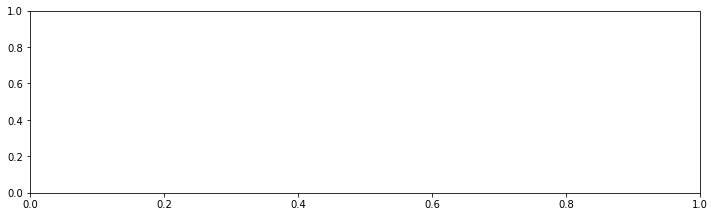

In [ ]:
# distribution of features

import matplotlib.gridspec as gridspec
features = train_df.iloc[:,1:82].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(train_df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(train_df[cn], bins=50)
    sns.distplot(train_df[cn], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

Droping columns

Selected `mostly-missing` feaures which have more than 99% of missing values.

Selected `too-skewed features` whose majority categories cover more than 99% of occurences.

Selected `hightly-correlated features`. Tested correlations between columns, picked up pairs whose corr is greater than 0.99, compared the distribution of the features in the pairs and corr with HasDetections, and selected the minor column for elimination.

You can eliminate 17 columns without worry:

(M) PuaMode
(M) Census_ProcessorClass
(S) Census_IsWIMBootEnabled
(S) IsBeta
(S) Census_IsFlightsDisabled
(S) Census_IsFlightingInternal
(S) AutoSampleOptIn
(S) Census_ThresholdOptIn
(S) SMode
(S) Census_IsPortableOperatingSystem
(S) Census_DeviceFamily
(S) UacLuaenable
(S) Census_IsVirtualDevice
(C) Platform
(C) Census_OSSkuName
(C) Census_OSInstallLanguageIdentifier
(C) Processor
Here, (M) denotes mostly-missing feaures, (S) means too-skewed features, and (C) indicates hightly-correlated features.

Use this code:

remove_cols = ['PuaMode', 'Census_ProcessorClass', 'Census_IsWIMBootEnabled', 'IsBeta', 'Census_IsFlightsDisabled', 'Census_IsFlightingInternal', 'AutoSampleOptIn', 'Census_ThresholdOptIn', 'SMode', 'Census_IsPortableOperatingSystem', 'Census_DeviceFamily', 'UacLuaenable', 'Census_IsVirtualDevice', 'Platform', 'Census_OSSkuName', 'Census_OSInstallLanguageIdentifier', 'Processor']

train.drop(remove_cols, axis=1, inplace=True)

test.drop(remove_cols, axis=1, inplace=True)

In [ ]:
#to be dropped
train_df['PuaMode'].value_counts().compute()

In [ ]:
#to be dropped
train_df['Census_ProcessorClass'].value_counts().compute()

In [ ]:
#Counting columnwise NA Values and considering columns having more than 30% na values for further examination
na_count=train_df.isnull().sum()
cols_to_remove=[]
for i in range(len(train_df.columns)):
  if  na_count[i]/len(train_df)>0.3:
    cols_to_remove.append(train_df.columns[i])
print('We got',len(cols_to_remove),' Columns which are having more than 30% NA values. \nDetails are   below: \n')
#Exploring the features with more than 30% null values
unique,null_val=[],[]
for column in cols_to_remove:
  unique.append(len(train_df[column].unique()))
  null_val.append(na_count[train_df.columns.get_loc(column)])
feat_info_null_30=pd.DataFrame({'FeatName':cols_to_remove,'Unique_cnt':unique,'Null_cnt':null_val})
feat_info_null_30

We got 9  Columns which are having more than 30% NA values. 
Details are   below: 



,FeatName,Unique_cnt,Null_cnt
0,DefaultBrowsersIdentifier,1731,8488045
1,OrganizationIdentifier,50,2751518
2,PuaMode,3,8919174
3,SmartScreen,22,3177011
4,Census_ProcessorClass,4,8884852
5,Census_InternalBatteryType,79,6338429
6,Census_IsFlightingInternal,3,7408759
7,Census_ThresholdOptIn,3,5667325
8,Census_IsWIMBootEnabled,3,5659703


We got 9  Columns which are having more than 30% NA values. 
List Of Columns below: 
 ['DefaultBrowsersIdentifier', 'OrganizationIdentifier', 'PuaMode', 'SmartScreen', 'Census_ProcessorClass', 'Census_InternalBatteryType', 'Census_IsFlightingInternal', 'Census_ThresholdOptIn', 'Census_IsWIMBootEnabled']
DefaultBrowsersIdentifier holds high propertinate null values and significant unique values so it holds no value for Malware Detections so we remove it.

Census_ThresholdOptIn holds high proportinate null values and seems not so important variable for Malware Detections so we remove it.

Census_IsFlightingInternal holds high proportinate null values and seems not so important variable for Malware Detections so we remove it

PuaMode holds higher proportinate null values so we remove it

Census_ProcessorClass higher proportinate null values so we remove it

Census_InternalBatteryType holds high propertinate null values and significant unique values so it holds no value for Malware Detections so we remove it.

Organization Identifier check if it is important for has detections and finalize the decision

smartScreen check if it is important for has detections and finalize the decision

Census_IsWIMBootEnabled check if it is important for has detections and finalize the decision

In [ ]:
#Removing the featurtes having higher null values
train_df=train_df.drop(['DefaultBrowsersIdentifier','Census_ThresholdOptIn','Census_IsFlightingInternal','PuaMode','Census_ProcessorClass','Census_InternalBatteryType'],axis=1)
#Smart Screen  needs some data cleansing
train_df['SmartScreen']=train_df['SmartScreen'].mask(train_df['SmartScreen']=='requireadmin','RequireAdmin').mask( train_df['SmartScreen']=='requireAdmin','RequireAdmin' )
train_df['SmartScreen']=train_df['SmartScreen'].mask(train_df['SmartScreen']=='prompt','Prompt').mask(train_df['SmartScreen']=='Promt','Prompt')
train_df['SmartScreen']=train_df['SmartScreen'].mask(train_df['SmartScreen']=='on','On').mask(train_df['SmartScreen']=='OFF','Off').mask(train_df['SmartScreen']=='off','Off')
train_df['SmartScreen']=train_df['SmartScreen'].mask(train_df['SmartScreen']=='00000000',np.NaN).mask(train_df['SmartScreen']=='0',np.NaN)
train_df['SmartScreen']=train_df['SmartScreen'].mask(train_df['SmartScreen']=='&#x03;',np.NaN).mask(train_df['SmartScreen']=='&#x01;',np.NaN).mask(train_df['SmartScreen']=='&#x02;',np.NaN)

we can replace missing values for features Organization Identifier, Smart Screen as they have some good amount of unique values and we can remove IsWIMBootEnabled as it has only 2 unique values and out of them 1 value occurs only one time so it cannot have dependency with out Traget variable

In [ ]:
train_df['OrganizationIdentifier']=train_df['OrganizationIdentifier'].fillna('27.0')
train_df['SmartScreen']=train_df['SmartScreen'].fillna('RequireAdmin')
train_df=train_df.drop(['Census_IsWIMBootEnabled'],axis=1)

In [ ]:
#Now lets get back to features which are having less than 30%  null values
na_count_1=train_df.isnull().sum()
cols_to_remove_1=[]
for i in range(len(train_df.columns)):
  if  na_count_1[i]/len(train_df)!=0.0:
    cols_to_remove_1.append(train_df.columns[i])
#Exploring the features with less  than 30% null values
unique,null_val=[],[]
for column in cols_to_remove_1:
  unique.append(len(train_df[column].unique()))
  null_val.append(na_count_1[train_df.columns.get_loc(column)])
feat_info_null=pd.DataFrame({'FeatName':cols_to_remove_1,'Unique_cnt':unique,'Null_cnt':null_val})
feat_info_null

,FeatName,Unique_cnt,Null_cnt
0,RtpStateBitfield,8,32318
1,AVProductStatesIdentifier,28971,36221
2,AVProductsInstalled,9,36221
3,AVProductsEnabled,7,36221
4,CityIdentifier,107367,325409
5,GeoNameIdentifier,293,213
6,OsBuildLab,664,21
7,IsProtected,3,36044
8,SMode,3,537759
9,IeVerIdentifier,304,58894


Fiiling Null Values

In [ ]:
#For all Numeric features we will use most frequent value(mode) to fill na values
cols_replace_with_mode=['RtpStateBitfield','AVProductsInstalled','AVProductsEnabled','AVProductStatesIdentifier','GeoNameIdentifier','IeVerIdentifier','Census_OEMNameIdentifier',
                       'Census_ProcessorCoreCount','Census_ProcessorManufacturerIdentifier' ,'Census_PrimaryDiskTotalCapacity','Census_PrimaryDiskTypeName','Census_InternalPrimaryDisplayResolutionVertical',
                       'Census_InternalPrimaryDisplayResolutionHorizontal','Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_FirmwareManufacturerIdentifier','Census_OSInstallLanguageIdentifier',
                        'Wdft_RegionIdentifier','Census_PowerPlatformRoleName','OsBuildLab']
for col in cols_replace_with_mode:
  train_df[col].fillna(train_df[col].mode()[0],inplace=True)

#For Binary categorical features we will replace null values with Flase as sufficient data not available to confirm  that value is true
cols_replace_with_false=['IsProtected','SMode','Firewall','Census_IsFlightsDisabled','Wdft_IsGamer','Census_IsVirtualDevice','Census_IsAlwaysOnAlwaysConnectedCapable','UacLuaenable']
for col in cols_replace_with_false:
  train_df[col].fillna(0.0,inplace=True)
train_df['UacLuaenable']=train_df['UacLuaenable'].mask(train_df['UacLuaenable']!=1.0,0.0)

#Let's use ffill method to fill na values for the features having high number of unique values and null values as well
cols_replace_with_ffill=['CityIdentifier','Census_OEMModelIdentifier','Census_ProcessorModelIdentifier','Census_SystemVolumeTotalCapacity','Census_TotalPhysicalRAM',
                         'Census_InternalBatteryNumberOfCharges','Census_FirmwareVersionIdentifier']
for col in cols_replace_with_ffill:
  train_df[col].fillna(method='ffill',inplace=True)

#Data Cleansing Census_ChassisTypeName
invalid_vals=[30,0,35,49,112,28,82,76,39,45,81,36,44,25,127,32,88,31]
train_df.Census_ChassisTypeName=train_df.Census_ChassisTypeName.mask(train_daf.Census_ChassisTypeName.isin(invalid_vals),np.NaN)
train_df['Census_ChassisTypeName'].fillna(train_df['Census_ChassisTypeName'].mode()[0],inplace=True)

TypeError: ignored

As a first step We have to Reduce the independent levels of Categorical features

Later we will convert Categorical features to Numerics.

We examined each feature individually and checked the variable distribution and on specific cut-off we are re redistributing the variable. As in many scenarios last 5% or 10% of values contains many number of unique levels with low distribution

In [ ]:
#Replacing categorical values which are having very low disribution   with the mode of  respectice categorical feature
train_data.ProductName=train_data.ProductName.replace(['mseprerelease','scep','windowsintune','fep'],'mse')
train_data.Platform=train_data.Platform.replace(['windows8','windows7','windows2016'],'other')
train_data.Processor=train_data.Processor.replace(['arm64'],'x64')
train_data.OsPlatformSubRelease=train_data.OsPlatformSubRelease.replace(['windows8.1','windows7','prers5'],'other')
train_data.SkuEdition=train_data.SkuEdition.replace(['Invalid','Education','Enterprise','Enterprise LTSB','Cloud','Server'],'other')
train_data.SmartScreen=train_data.SmartScreen.replace(['Off','Warn','Prompt','Block','On','warn','Enabled'],'other')
train_data.Census_MDC2FormFactor=train_data.Census_MDC2FormFactor.replace(['IoTOther','ServerOther','LargeServer','MediumServer','SmallServer','SmallTablet',
                                                                       'LargeTablet','PCOther'],'other')
train_data.Census_OSArchitecture=train_data.Census_OSArchitecture.replace(['arm64'],'x86')
train_data.Census_OSInstallTypeName=train_data.Census_OSInstallTypeName.replace(['CleanPCRefresh','Clean','Refresh','Reset'],'Other')
train_data.Census_OSWUAutoUpdateOptionsName=train_data.Census_OSWUAutoUpdateOptionsName.replace(['DownloadNotify','Off','AutoInstallAndRebootAtMaintenanceTime'],'Other')
train_data.Census_GenuineStateName=train_data.Census_GenuineStateName.replace(['TAMPERED','UNKNOWN','OFFLINE'],'Other')
train_data.Census_ActivationChannel=train_data.Census_ActivationChannel.replace(['Retail:TB:Eval','Volume:MAK','OEM:NONSLP'],'Other')
train_data.Census_FlightRing=train_data.Census_FlightRing.replace(['Invalid','Canary','OSG','Disabled','RP','WIS','WIF','Unknown'],'Other')
#For Feature Census_DeviceFamily
train_data.Census_DeviceFamily=train_data.Census_DeviceFamily.replace(['Windows','Windows.Server'],'other')
CTN=[ 'Detachable','LowProfileDesktop','HandHeld','SpaceSaving','Tablet','Tower','Unknown','MainServerChassis','MiniPC','LunchBox','RackMountChassis',
'SubNotebook','BusExpansionChassis','30','StickPC','0','MultisystemChassis','Blade','35','PizzaBox','SealedCasePC','SubChassis','ExpansionChassis','31',
'32','88','127','25','44','36','DockingStation','81','BladeEnclosure','CompactPCI','82','39','28','IoTGateway','112','76','EmbeddedPC','49','45']
train_data.Census_ChassisTypeName=train_data.Census_ChassisTypeName.replace([CTN],'other')
#For Feature Census_PowerPlatformRoleName
PPRN=['Workstation','SOHOServer','UNKNOWN','EnterpriseServer','AppliancePC','PerformanceServer','Unspecified']
train_data.Census_PowerPlatformRoleName=train_data.Census_PowerPlatformRoleName.replace([PPRN],'other')
#For Census_OSBranch
OSB=[ 'th2_release_sec','th1_st1','th1','rs5_release','rs3_release_svc_escrow_im','rs_prerelease','rs_prerelease_flt','rs5_release_sigma','rs1_release_srvmedia',
'winblue_ltsb_escrow','win7sp1_ldr','win8_gdr','winblue_ltsb','rs5_release_edge','rs_xbox','win7sp1_ldr_escrow','rs5_release_sigma_dev','win8_ldr',
'rs3_release_svc','rs_onecore_base_cobalt','rs_shell','rs5_release_sign','rs1_release_svc','rs1_release_sec','rs_onecore_stack_per1','Khmer OS']
train_data.Census_OSBranch=train_data.Census_OSBranch.replace([OSB],'Other')
#For Feature Census_OSEdition
OSE=['CoreCountrySpecific','ProfessionalEducation','Education','Enterprise','ProfessionalN','EnterpriseS','ServerStandard','Cloud','CoreN','ServerStandardEval',
'EducationN','EnterpriseSN','ServerDatacenterEval','ServerSolution','EnterpriseN','ProfessionalEducationN','ProfessionalWorkstation','ServerDatacenter',
'ProfessionalWorkstationN','CloudN','ProfessionalCountrySpecific','ServerRdsh','Ultimate','Home','ProfessionalSingleLanguage','HomePremium','Pro',
'professional','Enterprise 2015 LTSB','ServerDatacenterACor']
train_data.Census_OSEdition=train_data.Census_OSEdition.replace([OSE],'Other')
#For Feature Census_OSSkuName
OSS=[ 'EDUCATION','CLOUD','PROFESSIONAL_N','STANDARD_SERVER','CORE_N','STANDARD_EVALUATION_SERVER','EDUCATION_N','DATACENTER_EVALUATION_SERVER',
'SB_SOLUTION_SERVER','ENTERPRISE_N','PRO_WORKSTATION_N','PRO_WORKSTATION','UNLICENSED','ULTIMATE','CLOUDN','PRO_CHINA','SERVERRDSH','DATACENTER_SERVER',
'ENTERPRISEG','STARTER','PRO_FOR_EDUCATION','PRO_SINGLE_LANGUAGE','UNDEFINED']
train_data.Census_OSSkuName=train_data.Census_OSSkuName.replace([OSS],'Other')

# For Feature OsBuildLab  
df_feature = train_data['OsBuildLab'].value_counts()
index_details = train_data['OsBuildLab'].isin(df_feature.index[df_feature<27240])
train_data.loc[index_details, 'OsBuildLab'] = 'Other'
# For Feature AVProductsEnabled  
train_data['AVProductsEnabled']=train_data['AVProductsEnabled'].mask(train_data['AVProductsEnabled']!=1.0,0.0)
# For Feature AVProductsInstalled
AVP_ivValues=[3,4,5,6,7,0]
train_data['AVProductsInstalled']=train_data['AVProductsInstalled'].mask(train_data['AVProductsInstalled'].isin(AVP_ivValues),3)
# For Feature RtpStateBitfield
train_data['RtpStateBitfield']=train_data['RtpStateBitfield'].mask(train_data.RtpStateBitfield!=7.0,0.0)
# For Feature OsVer
train_data['OsVer']=train_data['OsVer'].mask(train_data.OsVer!='10.0.0.0','6.3.0.0')
# For Feature AVProductStatesIdentifier  
df_feature = train_data['AVProductStatesIdentifier'].value_counts()
index_details = train_data['AVProductStatesIdentifier'].isin(df_feature.index[df_feature<100])
train_data.loc[index_details, 'AVProductStatesIdentifier'] = 'Other'
# For Feature EngineVersion  
df_feature = train_data['EngineVersion'].value_counts()
index_details = train_data['EngineVersion'].isin(df_feature.index[df_feature<2000])
train_data.loc[index_details, 'EngineVersion'] = 'Other'
# For Feature AppVersion  
df_feature = train_data['AppVersion'].value_counts()
index_details = train_data['AppVersion'].isin(df_feature.index[df_feature<5000])
train_data.loc[index_details, 'AppVersion'] = 'Other'
# For Feature AvSigVersion  
df_feature = train_data['AvSigVersion'].value_counts()
index_details = train_data['AvSigVersion'].isin(df_feature.index[df_feature<5000])
train_data.loc[index_details, 'AvSigVersion'] = 'Other'
# For Feature CountryIdentifier    
df_feature = train_data['CountryIdentifier'].value_counts()
index_details = train_data['CountryIdentifier'].isin(df_feature.index[df_feature<5000])
train_data.loc[index_details, 'CountryIdentifier'] = 300
# For Feature CityIdentifier  
df_feature = train_data['CityIdentifier'].value_counts()
index_details = train_data['CityIdentifier'].isin(df_feature.index[df_feature<100])
train_data.loc[index_details, 'CityIdentifier'] = 11111
# For Feature OrganizationIdentifier  
df_feature = train_data['OrganizationIdentifier'].value_counts()
index_details = train_data['OrganizationIdentifier'].isin(df_feature.index[df_feature<100000])
train_data.loc[index_details, 'OrganizationIdentifier'] = 100
# For Feature GeoNameIdentifier  
df_feature = train_data['GeoNameIdentifier'].value_counts()
index_details = train_data['GeoNameIdentifier'].isin(df_feature.index[df_feature<17000])
train_data.loc[index_details, 'GeoNameIdentifier'] = 1111
# For Feature LocaleEnglishNameIdentifier  
df_feature = train_data['LocaleEnglishNameIdentifier'].value_counts()
index_details = train_data['LocaleEnglishNameIdentifier'].isin(df_feature.index[df_feature<20000])
train_data.loc[index_details, 'LocaleEnglishNameIdentifier'] = 1111
# For Feature OsBuild  
df_feature = train_data['OsBuild'].value_counts()
index_details = train_data['OsBuild'].isin(df_feature.index[df_feature<400000])
train_data.loc[index_details, 'OsBuild'] = 1111
# For Feature OsSuite
train_data['OsSuite']=train_data['OsSuite'].mask(train_data.OsSuite!=768,256)
# For Feature IeVerIdentifier  
df_feature = train_data['IeVerIdentifier'].value_counts()
index_details = train_data['IeVerIdentifier'].isin(df_feature.index[df_feature<170000])
train_data.loc[index_details, 'IeVerIdentifier'] = 111
# For Feature Census_OEMNameIdentifier  
df_feature = train_data['Census_OEMNameIdentifier'].value_counts()
index_details = train_data['Census_OEMNameIdentifier'].isin(df_feature.index[df_feature<50000])
train_data.loc[index_details, 'Census_OEMNameIdentifier'] = 111
# For Feature Census_OEMNameIdentifier  
df_avp=pd.DataFrame(train_data.Census_OEMModelIdentifier.value_counts())
df_avp['CumFreq']=100*df_avp.Census_OEMModelIdentifier.cumsum()/df_avp.Census_OEMModelIdentifier.sum()
train_data['Census_OEMModelIdentifier']=train_data['Census_OEMModelIdentifier'].mask(train_data.Census_OEMModelIdentifier.isin(list(df_avp.index[df_avp.CumFreq>99])),11111)
# For Feature Census_ProcessorCoreCount  
df_avp=pd.DataFrame(train_data.Census_ProcessorCoreCount.value_counts())
df_avp['CumFreq']=100*df_avp.Census_ProcessorCoreCount.cumsum()/df_avp.Census_ProcessorCoreCount.sum()
train_data['Census_ProcessorCoreCount']=train_data['Census_ProcessorCoreCount'].mask(train_data.Census_ProcessorCoreCount.isin(list(df_avp.index[df_avp.CumFreq>99])),4)
# For Feature Census_ProcessorManufacturerIdentifier  
train_data['Census_ProcessorManufacturerIdentifier']=train_data['Census_ProcessorManufacturerIdentifier'].replace([10,3,9,7,4],5)
# For Feature Census_PrimaryDiskTotalCapacity  
df_avp=pd.DataFrame(train_data.Census_PrimaryDiskTotalCapacity.value_counts())
df_avp['CumFreq']=100*df_avp.Census_PrimaryDiskTotalCapacity.cumsum()/df_avp.Census_PrimaryDiskTotalCapacity.sum()
train_data['Census_PrimaryDiskTotalCapacity']=train_data['Census_PrimaryDiskTotalCapacity'].mask(train_data.Census_PrimaryDiskTotalCapacity.isin(list(df_avp.index[df_avp.CumFreq>95])),476940.0	)
train_data['Census_PrimaryDiskTotalCapacity']=train_data['Census_PrimaryDiskTotalCapacity']/1000
# For Feature Census_TotalPhysicalRAM  
df_avp=pd.DataFrame(train_data.Census_TotalPhysicalRAM.value_counts())
df_avp['CumFreq']=100*df_avp.Census_TotalPhysicalRAM.cumsum()/df_avp.Census_TotalPhysicalRAM.sum()
train_data['Census_TotalPhysicalRAM']=train_data['Census_TotalPhysicalRAM'].mask(train_data.Census_TotalPhysicalRAM.isin(list(df_avp.index[df_avp.CumFreq>95])),4096	)
# For Feature Census_OSVersion  
df_avp=pd.DataFrame(train_data.Census_OSVersion.value_counts())
df_avp['CumFreq']=100*df_avp.Census_OSVersion.cumsum()/df_avp.Census_OSVersion.sum()
train_data['Census_OSVersion']=train_data['Census_OSVersion'].mask(train_data.Census_OSVersion.isin(list(df_avp.index[df_avp.CumFreq>95])),'other')
# For Feature Census_OSBuildNumber  
df_avp=pd.DataFrame(train_data.Census_OSBuildNumber.value_counts())
df_avp['CumFreq']=100*df_avp.Census_OSBuildNumber.cumsum()/df_avp.Census_OSBuildNumber.sum()
train_data['Census_OSBuildNumber']=train_data['Census_OSBuildNumber'].mask(train_data.Census_OSBuildNumber.isin(list(df_avp.index[df_avp.CumFreq>97])),11111)
# For Feature Census_OSBuildRevision  
df_avp=pd.DataFrame(train_data.Census_OSBuildRevision.value_counts())
df_avp['CumFreq']=100*df_avp.Census_OSBuildRevision.cumsum()/df_avp.Census_OSBuildRevision.sum()
train_data['Census_OSBuildRevision']=train_data['Census_OSBuildRevision'].mask(train_data.Census_OSBuildRevision.isin(list(df_avp.index[df_avp.CumFreq>95])),11111)
# For Feature Census_OSUILocaleIdentifier  
df_avp=pd.DataFrame(train_data.Census_OSUILocaleIdentifier.value_counts())
df_avp['CumFreq']=100*df_avp.Census_OSUILocaleIdentifier.cumsum()/df_avp.Census_OSUILocaleIdentifier.sum()
train_data['Census_OSUILocaleIdentifier']=train_data['Census_OSUILocaleIdentifier'].mask(train_data.Census_OSUILocaleIdentifier.isin(list(df_avp.index[df_avp.CumFreq>95])),111)
# For Feature Census_FirmwareManufacturerIdentifier  
df_avp=pd.DataFrame(train_data.Census_FirmwareManufacturerIdentifier.value_counts())
df_avp['CumFreq']=100*df_avp.Census_FirmwareManufacturerIdentifier.cumsum()/df_avp.Census_FirmwareManufacturerIdentifier.sum()
train_data['Census_FirmwareManufacturerIdentifier']=train_data['Census_FirmwareManufacturerIdentifier'].mask(train_data.Census_FirmwareManufacturerIdentifier.isin(list(df_avp.index[df_avp.CumFreq>98])),111)
# For Feature Census_ProcessorModelIdentifier  
df_feature = train_data['Census_ProcessorModelIdentifier'].value_counts()
index_details = train_data['Census_ProcessorModelIdentifier'].isin(df_feature.index[df_feature<10])
train_data.loc[index_details, 'Census_ProcessorModelIdentifier'] = 1111
# For Feature Census_SystemVolumeTotalCapacity  we convert MB's to GBs and  clip the outlier
train_data['Census_SystemVolumeTotalCapacity']=train_data['Census_SystemVolumeTotalCapacity']/1000
train_data.loc[train_data['Census_SystemVolumeTotalCapacity']>5000,'Census_SystemVolumeTotalCapacity']=5000
# For Feature Census_FirmwareVersionIdentifier  
df_feature = train_data['Census_FirmwareVersionIdentifier'].value_counts()
index_details = train_data['Census_FirmwareVersionIdentifier'].isin(df_feature.index[df_feature<5])
train_data.loc[index_details, 'Census_FirmwareVersionIdentifier'] = 11111

Droping a column

In [ ]:
train_copy1=train_data.copy()
#As Machine identifier is unique Id that does not holds value to target feature
train_data=train_data.drop(['MachineIdentifier'],axis=1)

In [ ]:
# Dropping the features with more than 70% missing values ----> TRAIN SET

train = train.drop(['DefaultBrowsersIdentifier','Census_ProcessorClass','Census_InternalBatteryType','Census_IsFlightingInternal','Census_ThresholdOptIn','Census_IsWIMBootEnabled','AutoSampleOptIn','PuaMode'],axis = 1).compute()

In [ ]:
# Here display size and resolutions can be related to the chassis type, so dropping these 3 features for which chassis type will represent in the dataset

train = train.drop(['Census_InternalPrimaryDiagonalDisplaySizeInInches','Census_InternalPrimaryDisplayResolutionHorizontal','Census_InternalPrimaryDisplayResolutionVertical'],axis = 1)

In [ ]:
#  Dropping the features with more than 70% missing values ----> TEST SET

test = test.drop(['DefaultBrowsersIdentifier','Census_ProcessorClass','Census_InternalBatteryType','Census_IsFlightingInternal','Census_ThresholdOptIn','Census_IsWIMBootEnabled','AutoSampleOptIn','PuaMode'],axis = 1).compute()

In [ ]:
# Here display size and resolutions can be related to the chassis type, so dropping these 3 features for which chassis type will represent in the dataset

test = test.drop(['Census_InternalPrimaryDiagonalDisplaySizeInInches','Census_InternalPrimaryDisplayResolutionHorizontal','Census_InternalPrimaryDisplayResolutionVertical'],axis = 1)

In [ ]:
print('Now Train set has',train.shape[0],'rows and',train.shape[1],'columns')
print('Now Test set has',test.shape[0],'rows and',test.shape[1],'columns')

Removing Highly skewed and missing features

In [ ]:
#code for highly skewed Feature
pd.options.display.float_format = '{:,.4f}'.format
sk_df = pd.DataFrame([{'column': c, 'uniq': df[c].nunique(), 'skewness': df[c].value_counts(normalize=True).values[0] * 100} for c in df.columns])
sk_df = sk_df.sort_values('skewness', ascending=False)
sk_df

In [ ]:
cols=['PuaMode',
 'Census_ProcessorClass',
 'Census_IsWIMBootEnabled',
 'IsBeta',
 'Census_IsFlightsDisabled',
 'Census_IsFlightingInternal',
 'AutoSampleOptIn',
 'Census_ThresholdOptIn',
 'SMode',
 'Census_IsPortableOperatingSystem',
 'Census_DeviceFamily',
 'UacLuaenable',
 'Census_IsVirtualDevice','DefaultBrowsersIdentifier']
data = df.drop(cols,1)

In [ ]:
# Checking data types of each column in train set

train.dtypes

In [ ]:
# checked list of categories for every feature

train['Wdft_RegionIdentifier'].value_counts()

Handling Missing Values

In [ ]:
train['IsProtected'] = train['IsProtected'].fillna(train['IsProtected'].mode())
train['AVProductsInstalled'] = train['AVProductsInstalled'].fillna(train['AVProductsInstalled'].mode()[0])
train['AVProductsEnabled'] = train['AVProductsEnabled'].fillna(train['AVProductsEnabled'].mode()[0])
train['CityIdentifier'] = train['CityIdentifier'].fillna(train['CityIdentifier'].mean())
train['RtpStateBitfield'] = train['RtpStateBitfield'].fillna(train['RtpStateBitfield'].mode()[0])
train['AVProductStatesIdentifier'] = train['AVProductStatesIdentifier'].fillna(train['AVProductStatesIdentifier'].mean())
train['OrganizationIdentifier'] = train['OrganizationIdentifier'].fillna(train['OrganizationIdentifier'].mode()[0])
train['GeoNameIdentifier'] = train['GeoNameIdentifier'].fillna(train['GeoNameIdentifier'].mode()[0])
train['OsBuildLab'] = train['OsBuildLab'].fillna(train['OsBuildLab'].mode()[0])
train['SMode'] = train['SMode'].fillna(train['SMode'].mode()[0])
train['IeVerIdentifier'] = train['IeVerIdentifier'].fillna(train['IeVerIdentifier'].mode()[0])
train['SmartScreen'] = train['SmartScreen'].fillna(train['SmartScreen'].mode()[0])
train['Firewall'] = train['Firewall'].fillna(train['Firewall'].mode()[0])
train['UacLuaenable'] = train['UacLuaenable'].fillna(train['UacLuaenable'].mode()[0])
train['Census_OEMNameIdentifier'] = train['Census_OEMNameIdentifier'].fillna(train['Census_OEMNameIdentifier'].mean())
train['Census_OEMModelIdentifier'] = train['Census_OEMModelIdentifier'].fillna(train['Census_OEMModelIdentifier'].mean())
train['Census_ProcessorCoreCount'] = train['Census_ProcessorCoreCount'].fillna(train['Census_ProcessorCoreCount'].mean())
train['Census_ProcessorManufacturerIdentifier'] = train['Census_ProcessorManufacturerIdentifier'].fillna(train['Census_ProcessorManufacturerIdentifier'].mode()[0])
train['Census_ProcessorModelIdentifier'] = train['Census_ProcessorModelIdentifier'].fillna(train['Census_ProcessorModelIdentifier'].mean())
train['Census_PrimaryDiskTotalCapacity'] = train['Census_PrimaryDiskTotalCapacity'].fillna(train['Census_PrimaryDiskTotalCapacity'].mean())
train['Census_PrimaryDiskTypeName'] = train['Census_PrimaryDiskTypeName'].fillna(train['Census_PrimaryDiskTypeName'].mode()[0])
train['Census_SystemVolumeTotalCapacity'] = train['Census_SystemVolumeTotalCapacity'].fillna(train['Census_SystemVolumeTotalCapacity'].mean())
train['Census_TotalPhysicalRAM'] = train['Census_TotalPhysicalRAM'].fillna(train['Census_TotalPhysicalRAM'].mean())
train['Census_ChassisTypeName'] = train['Census_ChassisTypeName'].fillna(train['Census_ChassisTypeName'].mode()[0])
train['Census_InternalBatteryNumberOfCharges'] = train['Census_InternalBatteryNumberOfCharges'].fillna(train['Census_InternalBatteryNumberOfCharges'].mean())
train['Census_OSInstallLanguageIdentifier'] = train['Census_OSInstallLanguageIdentifier'].fillna(train['Census_OSInstallLanguageIdentifier'].mode()[0])
train['Census_IsFlightsDisabled'] = train['Census_IsFlightsDisabled'].fillna(train['Census_IsFlightsDisabled'].mode()[0])
train['Census_FirmwareManufacturerIdentifier'] = train['Census_FirmwareManufacturerIdentifier'].fillna(train['Census_FirmwareManufacturerIdentifier'].mean())
train['Census_FirmwareVersionIdentifier'] = train['Census_FirmwareVersionIdentifier'].fillna(train['Census_FirmwareVersionIdentifier'].mean())
train['Census_IsVirtualDevice'] = train['Census_IsVirtualDevice'].fillna(train['Census_IsVirtualDevice'].mode()[0])
train['Census_IsAlwaysOnAlwaysConnectedCapable'] = train['Census_IsAlwaysOnAlwaysConnectedCapable'].fillna(train['Census_IsAlwaysOnAlwaysConnectedCapable'].mode()[0])
train['Wdft_IsGamer'] = train['Wdft_IsGamer'].fillna(train['Wdft_IsGamer'].mode()[0])
train['Wdft_RegionIdentifier'] = train['Wdft_RegionIdentifier'].fillna(train['Wdft_RegionIdentifier'].mode()[0])

In [ ]:
train['Census_PowerPlatformRoleName'] = train['Census_PowerPlatformRoleName'].fillna('UNKNOWN')

In [ ]:
test['IsProtected'] = test['IsProtected'].fillna(test['IsProtected'].mode()[0])
test['AVProductsInstalled'] = test['AVProductsInstalled'].fillna(test['AVProductsInstalled'].mode()[0])
test['AVProductsEnabled'] = test['AVProductsEnabled'].fillna(test['AVProductsEnabled'].mode()[0])
test['CityIdentifier'] = test['CityIdentifier'].fillna(test['CityIdentifier'].mode()[0])
test['RtpStateBitfield'] = test['RtpStateBitfield'].fillna(test['RtpStateBitfield'].mode()[0])
test['AVProductStatesIdentifier'] = test['AVProductStatesIdentifier'].fillna(test['AVProductStatesIdentifier'].mean())
test['OrganizationIdentifier'] = test['OrganizationIdentifier'].fillna(test['OrganizationIdentifier'].mode()[0])
test['GeoNameIdentifier'] = test['GeoNameIdentifier'].fillna(test['GeoNameIdentifier'].mode()[0])
test['OsBuildLab'] = test['OsBuildLab'].fillna(test['OsBuildLab'].mode()[0])
test['SMode'] = test['SMode'].fillna(test['SMode'].mode()[0])
test['IeVerIdentifier'] = test['IeVerIdentifier'].fillna(test['IeVerIdentifier'].mode()[0])
test['SmartScreen'] = test['SmartScreen'].fillna(test['SmartScreen'].mode()[0])
test['Firewall'] = test['Firewall'].fillna(test['Firewall'].mode()[0])
test['UacLuaenable'] = test['UacLuaenable'].fillna(test['UacLuaenable'].mode()[0])
test['Census_OEMNameIdentifier'] = test['Census_OEMNameIdentifier'].fillna(test['Census_OEMNameIdentifier'].mean())
test['Census_OEMModelIdentifier'] = test['Census_OEMModelIdentifier'].fillna(test['Census_OEMModelIdentifier'].mean())
test['Census_ProcessorCoreCount'] = test['Census_ProcessorCoreCount'].fillna(test['Census_ProcessorCoreCount'].mean())
test['Census_ProcessorManufacturerIdentifier'] = test['Census_ProcessorManufacturerIdentifier'].fillna(test['Census_ProcessorManufacturerIdentifier'].mode()[0])
test['Census_ProcessorModelIdentifier'] = test['Census_ProcessorModelIdentifier'].fillna(test['Census_ProcessorModelIdentifier'].mean())
test['Census_PrimaryDiskTotalCapacity'] = test['Census_PrimaryDiskTotalCapacity'].fillna(test['Census_PrimaryDiskTotalCapacity'].mean())
test['Census_PrimaryDiskTypeName'] = test['Census_PrimaryDiskTypeName'].fillna(test['Census_PrimaryDiskTypeName'].mode()[0])
test['Census_SystemVolumeTotalCapacity'] = test['Census_SystemVolumeTotalCapacity'].fillna(test['Census_SystemVolumeTotalCapacity'].mean())
test['Census_TotalPhysicalRAM'] = test['Census_TotalPhysicalRAM'].fillna(test['Census_TotalPhysicalRAM'].mean())
test['Census_ChassisTypeName'] = test['Census_ChassisTypeName'].fillna(test['Census_ChassisTypeName'].mode()[0])
test['Census_InternalBatteryNumberOfCharges'] = test['Census_InternalBatteryNumberOfCharges'].fillna(test['Census_InternalBatteryNumberOfCharges'].mean())
test['Census_OSInstallLanguageIdentifier'] = test['Census_OSInstallLanguageIdentifier'].fillna(test['Census_OSInstallLanguageIdentifier'].mode()[0])
test['Census_IsFlightsDisabled'] = test['Census_IsFlightsDisabled'].fillna(test['Census_IsFlightsDisabled'].mode()[0])
test['Census_FirmwareManufacturerIdentifier'] = test['Census_FirmwareManufacturerIdentifier'].fillna(test['Census_FirmwareManufacturerIdentifier'].mean())
test['Census_FirmwareVersionIdentifier'] = test['Census_FirmwareVersionIdentifier'].fillna(test['Census_FirmwareVersionIdentifier'].mean())
test['Census_IsVirtualDevice'] = test['Census_IsVirtualDevice'].fillna(test['Census_IsVirtualDevice'].mode()[0])
test['Census_IsAlwaysOnAlwaysConnectedCapable'] = test['Census_IsAlwaysOnAlwaysConnectedCapable'].fillna(test['Census_IsAlwaysOnAlwaysConnectedCapable'].mode()[0])
test['Wdft_IsGamer'] = test['Wdft_IsGamer'].fillna(test['Wdft_IsGamer'].mode()[0])
test['Wdft_RegionIdentifier'] = test['Wdft_RegionIdentifier'].fillna(test['Wdft_RegionIdentifier'].mode()[0])

In [ ]:
#copying data into table
table=data.copy()

In [ ]:
# Having a look at the data after cleaning
table.head()

Finding Correlation

Correlation using Filter Methods

In [ ]:
#selecting only numeric cells

numeric=data.select_dtypes(include=np.number)

In [ ]:
numeric.shape

In [ ]:
cat=data.select_dtypes(include='O')

In [ ]:
cat.head()

In [ ]:

cat.shape

In [ ]:
#removing using corr() Method
corr_features=set()
corr_matrix=numeric.corr()

In [ ]:
corr_matrix.compute()

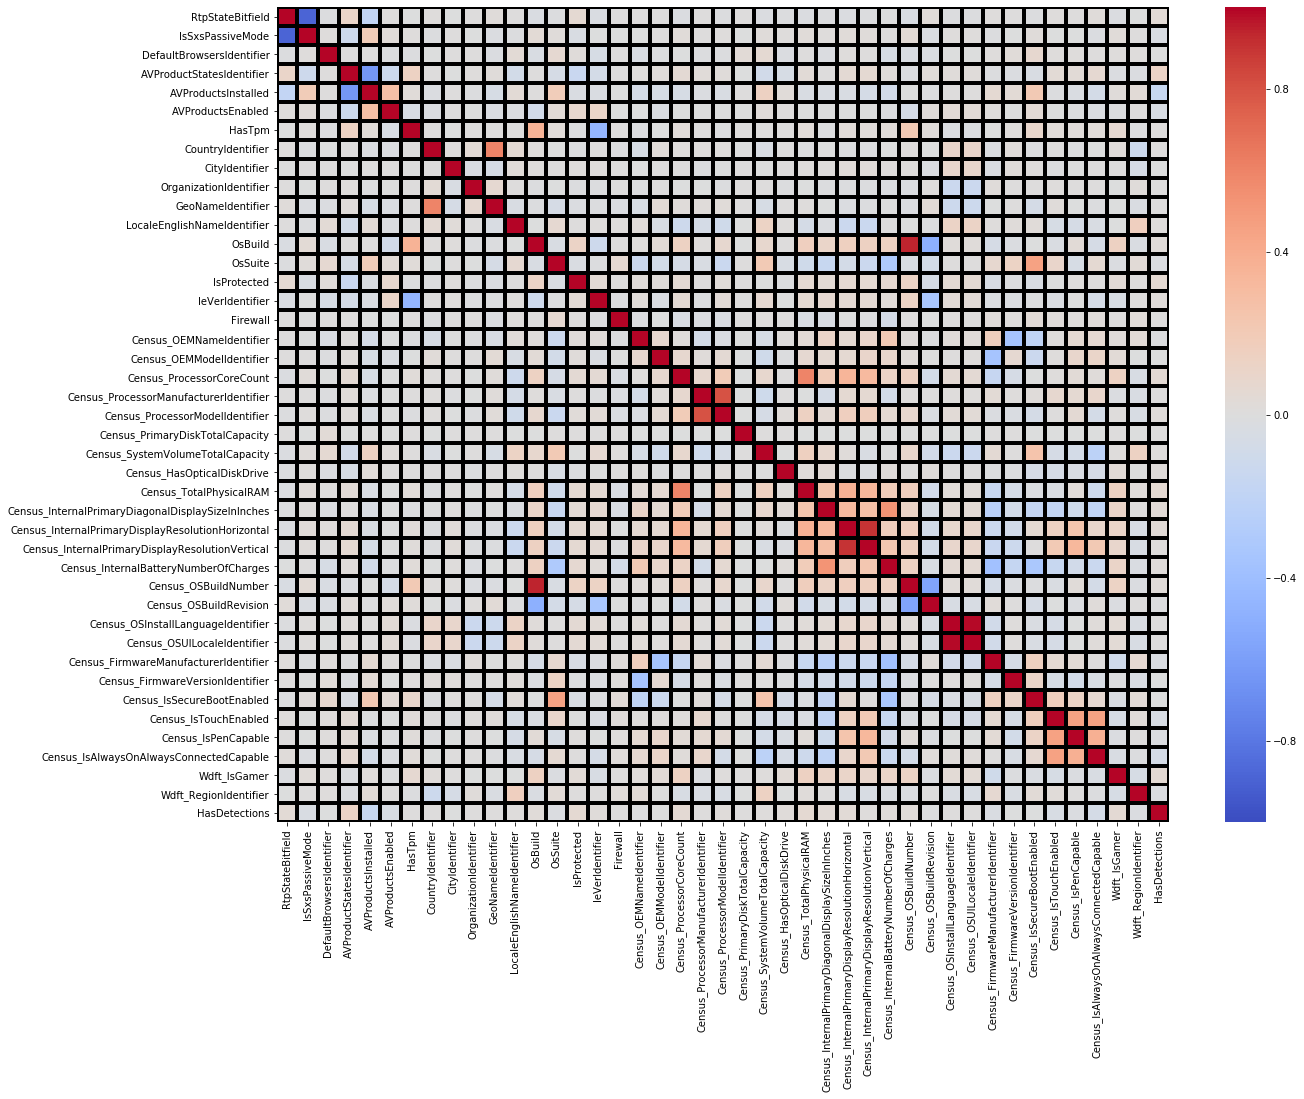

In [ ]:
#visualisation
import seaborn as sns
%matplotlib inline
plt.subplots(figsize=(20,15))
corr = numeric.corr(method='pearson')
ax = sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

In [ ]:
numeric.shape

working on HIGHLY CORRELATED FEATURES # 0.9 to 1

In [ ]:
#to calculate the no. of unique values
print(df['OsBuild'].nunique().compute())
print(df['Census_OSBuildNumber'].nunique().compute())

In [ ]:
#to be dropped
numeric[['OsBuild','Census_OSBuildNumber','HasDetections']].corr(method='pearson').compute()

In [ ]:
df[['Census_OSBuildNumber','Census_OSBuildRevision','HasDetections']].corr(method='pearson').compute()

In [ ]:
#to be dropped
numeric[['Census_OSUILocaleIdentifier','Census_OSInstallLanguageIdentifier','HasDetections']].corr(method='pearson').compute()

In [ ]:
#TO BE DROPPED
df[['Census_InternalPrimaryDisplayResolutionHorizontal','Census_InternalPrimaryDisplayResolutionVertical','HasDetections']].corr(method='pearson').compute()

0.3 to 0.5 positive or negative indicates a weak correlation.

0 to 0.3 positive or negative indicates a negligible correlation.

In [ ]:
dropping cols
cols1=['Census_OSBuildNumber','Census_InternalPrimaryDisplayResolutionVertical','Census_OSUILocaleIdentifier']
numeric=numeric.drop(cols1,axis=1)

In [ ]:
numeric.shape

Imputing Value

In [ ]:
numeric.columns

IMPUATATION Techniques:

1.Dropping

2.constant number

3.Mean,median,mode

4.KNN

5.MICE

We will have to take care of "OUTLIER" as they introduce bias in **data**

In [ ]:
numeric['OrganizationIdentifier'].value_counts().compute()

In [ ]:
numeric['OrganizationIdentifier'].nunique().compute()

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

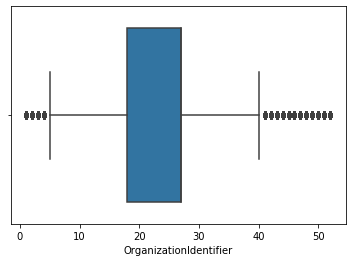

In [ ]:
sns.boxplot(x=numeric['OrganizationIdentifier'])

Conclusion:MODE

In [ ]:
numeric['CityIdentifier'].value_counts().compute()

In [ ]:
numeric['CityIdentifier'].nunique().compute()

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

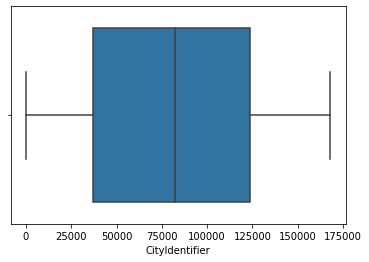

In [ ]:
sns.boxplot(x=numeric['CityIdentifier'])

conc.:KNN

In [ ]:
numeric['Wdft_IsGamer'].value_counts().compute()

In [ ]:
numeric['Wdft_IsGamer'].nunique().compute()

Conc.: replace with zeroes

In [ ]:
print("Unique values:",numeric['Wdft_RegionIdentifier'].nunique().compute())
print("% Missing values:",(numeric['Wdft_RegionIdentifier'.isna().mean().compute().round(4) * 100))
numeric['Wdft_RegionIdentifier'].value_counts().compute()

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

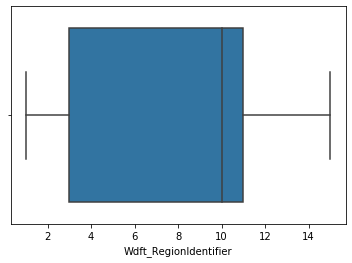

In [ ]:
sns.boxplot(numeric['Wdft_RegionIdentifier'])

Conc:KNN

In [ ]:
print("Unique values:",numeric['Census_InternalBatteryNumberOfCharges'].nunique().compute())
numeric['Census_InternalBatteryNumberOfCharges'].value_counts().compute()

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

In [ ]:
sns.boxplot(numeric['Census_InternalBatteryNumberOfCharges'])

Conc.:Mode or higher

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

Unique values: 712


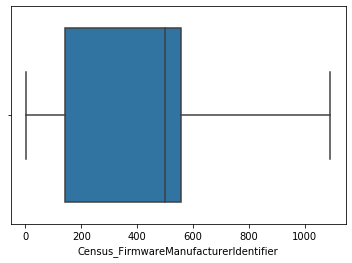

In [ ]:
print("Unique values:",numeric['Census_FirmwareManufacturerIdentifier'].nunique().compute())
numeric['Census_FirmwareManufacturerIdentifier'].value_counts().compute()
sns.boxplot(numeric['Census_FirmwareManufacturerIdentifier'])


Conc:Replace with mode

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

Unique values: 50494


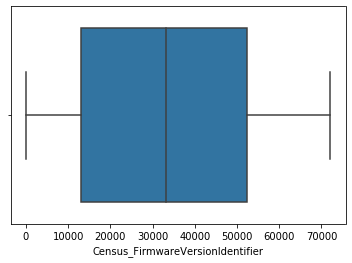

In [ ]:
print("Unique values:",numeric['Census_FirmwareVersionIdentifier'].nunique().compute())
sns.boxplot(numeric['Census_FirmwareVersionIdentifier'])

In [ ]:
print(numeric['Census_FirmwareVersionIdentifier'].value_counts().compute())

Conc:KNN

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

Unique values: 175365


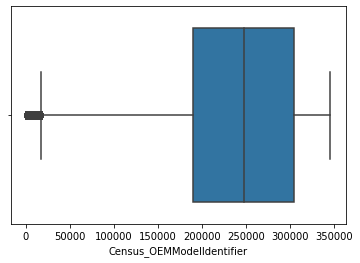

In [ ]:
print("Unique values:",numeric['Census_OEMModelIdentifier'].nunique().compute())
sns.boxplot(numeric['Census_OEMModelIdentifier'])

In [ ]:
print(numeric['Census_OEMModelIdentifier'].value_counts().compute())

Conc.:knn

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

Unique values: 3832


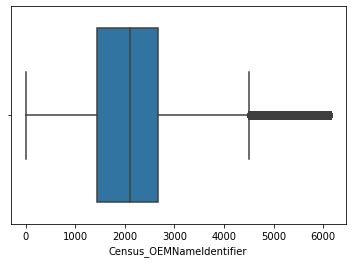

In [ ]:
print("Unique values:",numeric['Census_OEMNameIdentifier'].nunique().compute())
sns.boxplot(numeric['Census_OEMNameIdentifier'])

In [ ]:
print(numeric['Census_OEMNameIdentifier'].value_counts().compute())

conc:KNN

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

In [ ]:
print("Unique values:",numeric['Firewall'].nunique().compute())
sns.boxplot(numeric['Firewall'])

In [ ]:
print(numeric['Firewall'].value_counts().compute())

Conc:replace by mode

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

In [ ]:
print("Unique values:",numeric['Census_TotalPhysicalRAM'].nunique().compute())
sns.boxplot(numeric['Census_TotalPhysicalRAM'])

In [ ]:
numeric['Census_TotalPhysicalRAM'].value_counts().compute()

Conc:Mode or higher

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

In [ ]:
print("Unique values:",numeric['Census_IsAlwaysOnAlwaysConnectedCapable'].nunique().compute())
sns.boxplot(numeric['Census_IsAlwaysOnAlwaysConnectedCapable'])

In [ ]:
numeric['Census_IsAlwaysOnAlwaysConnectedCapable'].value_counts().compute()

Conc:replace by mode

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

In [ ]:
print("Unique values:",numeric['Census_OSInstallLanguageIdentifier'].nunique().compute())
sns.boxplot(numeric['Census_OSInstallLanguageIdentifier'])

In [ ]:
numeric['Census_OSInstallLanguageIdentifier'].value_counts().compute()

Conc:Mode or higher

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

Unique values: 303


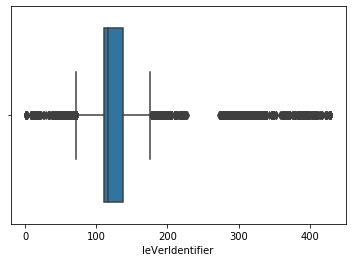

In [ ]:
print("Unique values:",numeric['IeVerIdentifier'].nunique().compute())
sns.boxplot(numeric['IeVerIdentifier'])

In [ ]:
numeric['IeVerIdentifier'].value_counts().compute()

Conc:MOde or higher

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

In [ ]:
print("Unique values:",numeric['Census_SystemVolumeTotalCapacity'].nunique().compute())
sns.boxplot(numeric['Census_SystemVolumeTotalCapacity'])

In [ ]:
numeric['Census_SystemVolumeTotalCapacity'].value_counts().compute()

Conc:KNN

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

In [ ]:
print("Unique values:",numeric['Census_PrimaryDiskTotalCapacity'].nunique().compute())
sns.boxplot(numeric['Census_PrimaryDiskTotalCapacity'])

In [ ]:
numeric['Census_PrimaryDiskTotalCapacity'].value_counts().compute()

Conc:Higher or MOde

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

In [ ]:
print("Unique values:",numeric['Census_InternalPrimaryDisplayResolutionHorizontal'].nunique().compute())
sns.boxplot(numeric['Census_InternalPrimaryDisplayResolutionHorizontal'])

In [ ]:
numeric['Census_InternalPrimaryDisplayResolutionHorizontal'].value_counts().compute()

Conc:Mode

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

In [ ]:
print("Unique values:",numeric['Census_InternalPrimaryDiagonalDisplaySizeInInches'].nunique().compute())
sns.boxplot(numeric['Census_InternalPrimaryDiagonalDisplaySizeInInches'])

In [ ]:
numeric['Census_InternalPrimaryDiagonalDisplaySizeInInches'].value_counts().compute()


**Conc:MOde**

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

In [ ]:
print("Unique values:",numeric['Census_ProcessorCoreCount'].nunique().compute())
sns.boxplot(numeric['Census_ProcessorCoreCount'])

In [ ]:
numeric['Census_ProcessorCoreCount'].value_counts().compute()


**Conc:Mode**

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

In [ ]:
print("Unique values:",numeric['Census_ProcessorManufacturerIdentifier'].nunique().compute())
sns.boxplot(numeric['Census_ProcessorManufacturerIdentifier'])

In [ ]:
numeric['Census_ProcessorManufacturerIdentifier'].value_counts().compute()

**Conc:MOde**

---



Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

In [ ]:
print("Unique values:",numeric['Census_ProcessorModelIdentifier'].nunique().compute())
sns.boxplot(numeric['Census_ProcessorModelIdentifier'])

In [ ]:
numeric['Census_ProcessorModelIdentifier'].value_counts().compute()


Conc:KNN

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

In [ ]:
print("Unique values:",numeric['AVProductsEnabled'].nunique().compute())
sns.boxplot(numeric['AVProductsEnabled'])

In [ ]:
numeric['AVProductsEnabled'].value_counts().compute()


**Conc:Mode**

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

In [ ]:
print("Unique values:",numeric['AVProductsInstalled'].nunique().compute())
sns.boxplot(numeric['AVProductsInstalled'])

In [ ]:
numeric['AVProductsInstalled'].value_counts().compute()


**Conc:Mode**

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

In [ ]:
print("Unique values:",numeric['AVProductStatesIdentifier'].nunique().compute())
sns.boxplot(numeric['AVProductStatesIdentifier'])

In [ ]:
numeric['AVProductStatesIdentifier'].value_counts().compute()


**Conc:Mode**

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

In [ ]:
print("Unique values:",numeric['IsProtected'].nunique().compute())
sns.boxplot(numeric['IsProtected'])

In [ ]:
numeric['IsProtected'].value_counts().compute()


**Conc:Mode**

Box plots is used to check outliers because if you have outlier in data and you impute with median than it will clearly introduce a bias in model.

In [ ]:
print("Unique values:",numeric['RtpStateBitfield'].nunique().compute())
sns.boxplot(numeric['RtpStateBitfield'])

In [ ]:
numeric['RtpStateBitfield'].value_counts().compute()

**Conc:Mode**

In [ ]:
del_mode=['OrganizationIdentifier','Wdft_IsGamer','Census_FirmwareManufacturerIdentifier','Firewall','Census_IsAlwaysOnAlwaysConnectedCapable','Census_InternalPrimaryDisplayResolutionHorizontal','Census_InternalPrimaryDiagonalDisplaySizeInInches','Census_ProcessorCoreCount','OrganizationIdentifier','RtpStateBitfield','IsProtected','AVProductStatesIdentifier','Census_ProcessorManufacturerIdentifier','AVProductsInstalled','AVProductsEnabled']

In [ ]:
numeric['Census_FirmwareManufacturerIdentifier']=numeric['Census_FirmwareManufacturerIdentifier'].fillna(numeric['Census_FirmwareManufacturerIdentifier'].value_counts().shape[0]).compute()

In [ ]:
del_knn=['CityIdentifier','Wdft_RegionIdentifier','Census_InternalBatteryNumberOfCharges','Census_FirmwareVersionIdentifier','CityIdentifier','Census_ProcessorModelIdentifier','Census_PrimaryDiskTotalCapacity','Census_SystemVolumeTotalCapacity','IeVerIdentifier','Census_OEMNameIdentifier','Census_OEMModelIdentifier','','Census_OSInstallLanguageIdentifier','Census_TotalPhysicalRAM']

In [ ]:
(numeric.isna().mean().compute().round(4) * 100).sort_values(ascending=False)

**For categorical**

In [ ]:
(cat.isna().mean().compute().round(4) * 100).sort_values(ascending=False)

In [ ]:
cat.head()

In [ ]:
print("Unique values:",cat['Census_InternalBatteryType'].nunique().compute())
sns.boxplot(cat['Census_InternalBatteryType'])

Unique values: 78


In [ ]:
cat['Census_InternalBatteryType'].value_counts().compute()

**Conc:NO idea**

In [ ]:
#needs some cleaning
print("Unique values:",cat['SmartScreen '].nunique().compute())
sns.boxplot(cat['SmartScreen '])

In [ ]:
cat['SmartScreen '].value_counts().compute()

In [ ]:
print("Unique values:",cat['Census_PrimaryDiskTypeName'].nunique().compute())
sns.boxplot(cat['Census_PrimaryDiskTypeName'])

In [ ]:
cat['Census_PrimaryDiskTypeName'].value_counts().compute()

**Conc:KNN or MOde**

In [ ]:
print("Unique values:",cat['Census_ChassisTypeName'].nunique().compute())
sns.boxplot(cat['Census_ChassisTypeName'])

In [ ]:
cat['Census_ChassisTypeName'].value_counts().compute()

****Conc:Mode****

In [ ]:
#imputing categorical
table['Census_ChassisTypeName']=table['Census_ChassisTypeName'].fillna(table['Census_ChassisTypeName'].mode())

In [ ]:
table['Census_ChassisTypeName'].isna().mean().pr

In [ ]:
# Splitting the train data into dependent and independent variables

X_train=train.iloc[:,:-1]

y_train=train.iloc[:,71]

Categorical encoding

In [ ]:
#Importing required libraries and Loading data using Dask Framework which is highly scalable to  handling&Computing large datasets
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dask.dataframe as dd
from sklearn.model_selection  import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
train_data=dd.read_csv('/content/drive/My Drive/DATASETS/MS MALWARE DATA/CleanData.csv',
                  dtype={ 'AVProductsEnabled':'float64' ,
                         'AVProductsInstalled':'float64' , 
                         'IsProtected':'float64',
                         'PuaMode':'object',
                         'Census_IsPenCapable': 'int64',
                        'Census_IsSecureBootEnabled': 'int64',
                          'Census_IsTouchEnabled': 'int64',
                            'HasDetections': 'int64'})
train_data=train_data.compute()

We are not using Onehot encoder as it leads to numerous features and could leat to over fitiing and curse of dimenasionality. and also if we use label encoder and if there are 5 unique features than 5th feature which will have label as 4 will have more weight as in real case there is no relation or order like that.

For Binary Categorical features we can use Lable Encoding to transform them into numerical values

For Low level categorical variables we will use dummy encoding to convert into numeric values

For High Level categorical variables we will use Logadd Ratio to conver into numeric

In [ ]:
#Replacing Binary categories with 0 or 1
Binary_cols=['ProductName','RtpStateBitfield','AVProductsInstalled','Platform','Processor','OsVer','OsSuite','Census_DeviceFamily','Census_ProcessorManufacturerIdentifier',
             'Census_OSArchitecture']
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for col in Binary_cols:
  train_data[col]=lab.fit_transform(train_data[col])

  #Converting Low level categories  into dummy t values
  #subset1
  dummy_cols1=['OrganizationIdentifier','OsPlatformSubRelease','SkuEdition','SmartScreen','Census_MDC2FormFactor','Census_PrimaryDiskTypeName','Census_ChassisTypeName',
            'Census_PowerPlatformRoleName','Census_OSBranch','Census_OSBuildNumber']
Prefix_dict={'OrganizationIdentifier':'Org_Identifier','OsPlatformSubRelease':'OSPFSubRelease','Census_PrimaryDiskTypeName':'PrimaryDiskType',
             'SkuEdition':'SkuEdition','SmartScreen':'SmartScreen','Census_ChassisTypeName':'ChassisType','Census_OSBranch':'OSBranch','Census_OSBuildNumber':'OSBuildNbr','Census_MDC2FormFactor':'MDC2FF'
             ,'Census_PowerPlatformRoleName':'PowerPFRole'}
dummy_cols_numerics1=pd.get_dummies(data=train_data[dummy_cols1],columns=dummy_cols1,prefix=Prefix_dict)
train_data=pd.concat([dummy_cols_numerics1,train_data],axis=1)
train_data=train_data.drop(dummy_cols1,axis=1)
#SubSet2
dummy_cols2=['Census_OSEdition','Census_OSSkuName','Census_OSInstallTypeName','Census_OSWUAutoUpdateOptionsName','Census_GenuineStateName',
            'Census_ActivationChannel','Census_FlightRing']
Prefix_dict={'Census_OSEdition':'OSEdition','Census_OSSkuName':'OSSkuName','Census_GenuineStateName':'GenuineStateName','Census_FlightRing':'FlightRing',
             'Census_OSWUAutoUpdateOptionsName':'OSAutoUpdOpt','Census_OSInstallTypeName':'OSInstallType',
             'Census_ActivationChannel':'Activation_Channel'}
dummy_cols_numerics2=pd.get_dummies(data=train_data[dummy_cols2],columns=dummy_cols2,prefix=Prefix_dict)
train_data=pd.concat([dummy_cols_numerics2,train_data],axis=1)
train_data=train_data.drop(dummy_cols2,axis=1)

#Replacing High level  categorical values w ith log add ratio values
def LogOdd(feature):
  feat_ct_data=pd.crosstab(train_data[feature],train_data['HasDetections']).rename_axis(None,axis=1).reset_index()
  feat_ct_data['Total_Counts']=feat_ct_data[1.0]+feat_ct_data[0.0]
  feat_ct_data['Probability  of Malware attack']=feat_ct_data[1.0]/(feat_ct_data[0.0]+feat_ct_data[1.0])
  feat_ct_data['LogOddsRatio']=np.log(feat_ct_data[1.0]/feat_ct_data['Total_Counts'])-np.log(feat_ct_data[0.0]/feat_ct_data['Total_Counts'])
  map_dict=feat_ct_data[[feature,'LogOddsRatio']].set_index(feature).T.to_dict('records')[0]
  train_data[feature]=train_data[feature].map(map_dict)

high_level_cols=['OsBuildLab','Census_OEMNameIdentifier','Census_OEMModelIdentifier','Census_ProcessorModelIdentifier','AVProductStatesIdentifier'
,'Census_OSVersion','Census_OSBuildRevision','Census_OSInstallLanguageIdentifier','Census_OSUILocaleIdentifier','Census_FirmwareManufacturerIdentifier','EngineVersion','AppVersion','AvSigVersion','CountryIdentifier',
'CityIdentifier','GeoNameIdentifier','LocaleEnglishNameIdentifier','OsBuild','IeVerIdentifier','Census_FirmwareVersionIdentifier','Wdft_RegionIdentifier']
for col in high_level_cols:
  LogOdd(col)

  #Resetting the index
  train_data.reset_index(drop=True,inplace=True)

In [ ]:
#Replacing inf values with 0
  for col in list(train_data.columns[train_data.isin([np.inf,-np.inf]).any()] ):
   train_data[col]=train_data[col].replace([np.inf,-np.inf],0)

Let's Use PCA Technique to reduce the dimensionality and feed the transformed data to Logistics algorithm

In [ ]:
#Let's Take only 50 % of the data from dataset and examine further
ipfeat=train_data.drop('HasDetections',axis=1)
op=train_data['HasDetections']
X_train,X_test,y_train,y_test=train_test_split(ipfeat,op,test_size=0.5,random_state=1234)
pca=PCA(n_components=75)
trans_data=pca.fit_transform(X_train)
#Splitiing data further to test accuracy score using different models
X_tr,X_te,y_tr,y_te=train_test_split(trans_data,y_train,test_size=0.3,random_state=1234)
#Using Grid search CV We obtained best parameters which we are applying here
log=LogisticRegression(C=100, solver= 'newton-cg',penalty='l2',random_state=1234).fit(X_tr,y_tr)
print('Model Score : ',log.score(X_tr,y_tr))
y_pred=log.predict(X_te)
print('Accuracy Score on test data',accuracy_score(y_te,y_pred))

Building a model

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(test)